In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("./Data/economic_index.csv")
print(df.head())

   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256


In [ ]:
# drop un necessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
# checking if null values are presen
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

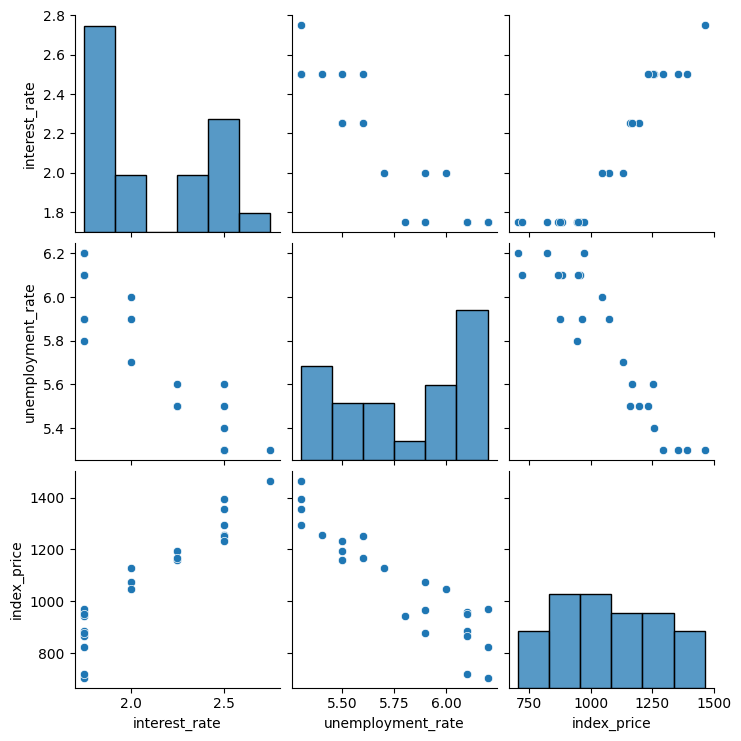

In [10]:
import seaborn as sns

sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

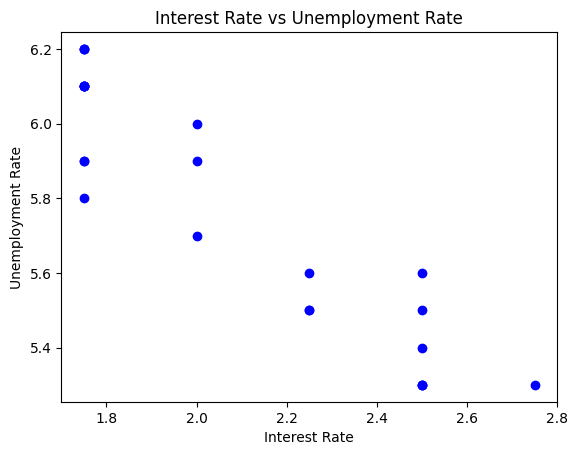

In [15]:
# Visulalizing the data point more closely

plt.scatter(df['interest_rate'], df['unemployment_rate'], color='blue')
plt.title('Interest Rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [16]:
# Getting independent and dependent variables
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [19]:
# Training and Testing data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

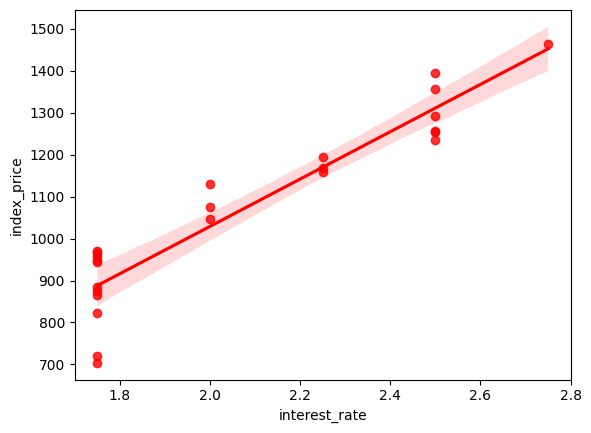

In [25]:
sns.regplot(x='interest_rate', y='index_price', data=df, color='red')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

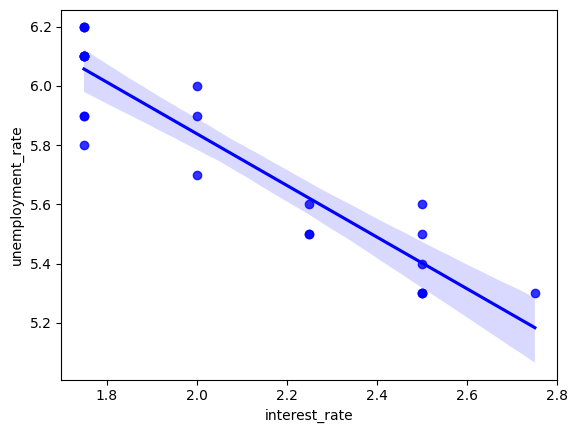

In [26]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df, color='blue')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Cross Val score



In [28]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=3)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

Cross-validation scores: [-4921.61331265 -7686.87497294 -5135.9962549 ]
Mean cross-validation score: -5914.8281801623925


In [29]:
# predicting the test set
y_pred = model.predict(X_test)

/Users/sarangia/Desktop/Master/Learning/Gen AI/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
# Performace Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2:.2f}%')

Mean Squared Error: 316313.15240145754
Mean Absolute Error: 549.3922441707881
Root Mean Squared Error: 562.4172404909522
R^2 Score: -8.40%


## Assumptions, My model is trained well

How to check ? below are some ways we can check 

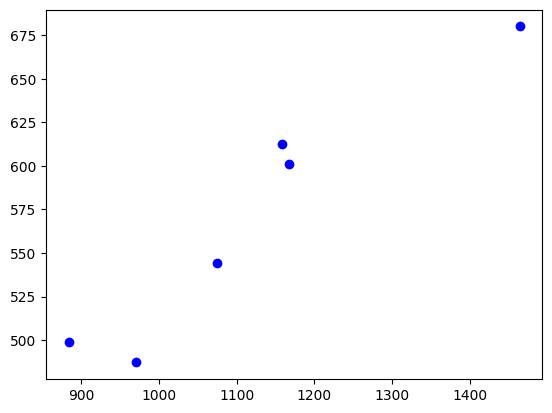

In [32]:
plt.scatter(y_test, y_pred, color='blue') # If they are linear then model is good

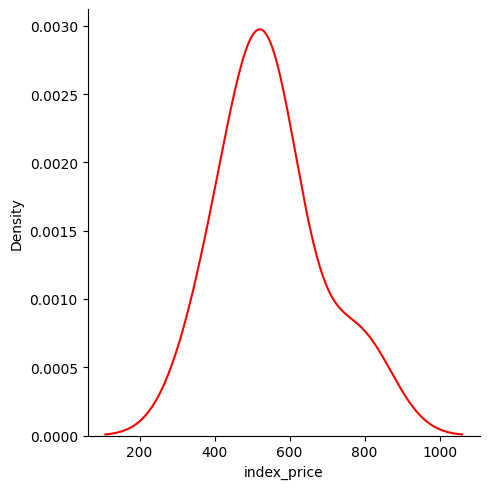

In [ ]:
residuals = y_test - y_pred

sns.displot(residuals, color='red', kind='kde') # if this is a curve model is good

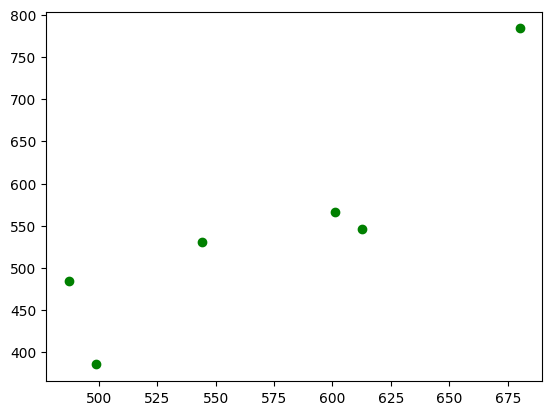

In [35]:
## Scater plot with respect to prediction and residuals
plt.scatter(y_pred, residuals, color='green')

In [36]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  88.27275507 -116.25716066]
Model Intercept: 1053.4444444444443
